In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Loading and Reviewing**

In [ ]:
df=pd.read_csv('movie_reviews.tsv', sep='\t')
df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [ ]:
df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

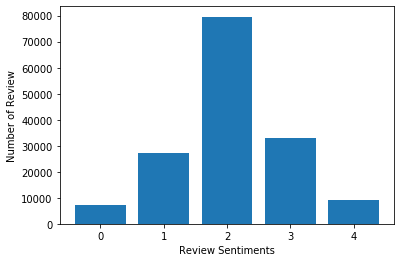

In [ ]:
sentiment_count = df.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

**Cleaning/Preprocessing Text**

In [ ]:
text = " ".join(review for review in df['Phrase'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6432359 words in the combination of all review.


In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_text = sent_tokenize(text)
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(lower_tokens)
print(fdist.most_common(10))

[('the', 51220), (',', 42006), ('a', 36124), ('of', 32308), ('and', 31763), ('to', 22448), ('.', 17939), ("'s", 16971), ('in', 13745), ('is', 13447)]


In [ ]:
# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokenized_word]
# Retain alphabetic words
alpha_only = [t for t in lower_tokens if t.isalpha()]
# Remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in alpha_only]

In [ ]:
from nltk.corpus import stopwords
stop_words=set(STOPWORDS)
stop_words.update(["movie", "film", "actor", "writer", "director", "one"])
no_stops=[]
for w in stripped:
    if w not in stop_words:
        no_stops.append(w)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
fdist_1 = FreqDist(lemmatized)
print(fdist_1.most_common(10))

[('character', 2850), ('story', 2831), ('make', 2415), ('time', 2293), ('good', 2066), ('comedy', 1939), ('much', 1862), ('life', 1862), ('way', 1767), ('work', 1701)]


In [ ]:
# Convert list to string
text_cleaned = ' '.join([str(w) for w in lemmatized])

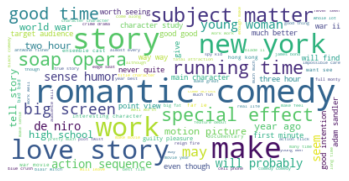

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text_cleaned)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

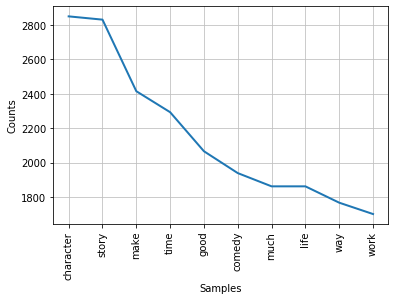

In [ ]:
fdist_1.plot(10, cumulative=False)
plt.show()

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X = df['Phrase']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vectorizer = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.tran(X_test)

In [ ]:
clf = MultinomialNB(alpha = 0.9)
clf.fit(count_train, y_train)
y_pred_count = clf.predict(count_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_count))

MultinomialNB Accuracy: 0.60399846212995
Confusion Matrix:
 [[  594   986   459    68    12]
 [  563  3415  3789   472    38]
 [  205  2196 18533  2661   221]
 [   16   396  3894  4924   706]
 [    4    40   418  1396   812]]


In [ ]:
clf.fit(tfidf_train, y_train)
y_pred_tfidf = clf.predict(tfidf_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_tfidf))

MultinomialNB Accuracy: 0.5872954846426588
Confusion Matrix:
 [[  100   897  1082    39     1]
 [   60  2270  5696   250     1]
 [   12  1139 20964  1675    26]
 [    2   140  5698  4001    95]
 [    0    19   904  1586   161]]


In [ ]:
alphas = np.arange(0, 1, .1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.5944294929300696

Alpha:  0.1
Score:  0.5967576573112905

Alpha:  0.2
Score:  0.5979751377675253

Alpha:  0.30000000000000004
Score:  0.598957665855013

Alpha:  0.4
Score:  0.6006877696612414

Alpha:  0.5
Score:  0.6013926267674826

Alpha:  0.6000000000000001
Score:  0.6017130163612285

Alpha:  0.7000000000000001
Score:  0.6032508864112094

Alpha:  0.8
Score:  0.603678072536204

Alpha:  0.9
Score:  0.60399846212995

